In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backend_bases import MouseButton

In [2]:
def arrange_in_circle(n_agents: int, radius: float) -> np.ndarray:
    thetas = np.linspace(0, 2 * np.pi, n_agents, endpoint=False)
    return np.array([np.cos(thetas), np.sin(thetas)]).T

In [3]:
def get_random_partners(n_agents: int) -> np.ndarray:
    partners = []
    for i in range(n_agents):
        # possible_partners = list(range(n_agents)).remove(i)
        possible_partners = np.array([j for j in range(n_agents) if j != i])
        partners.append(np.random.choice(possible_partners, 2, replace=False))
    return np.array(partners)

In [4]:
def isosceles_triangle_agent_offset(
    agent: np.ndarray,
    reference_1: np.ndarray,
    reference_2: np.ndarray,
):
    a_r1 = reference_1 - agent
    r1_r2 = reference_2 - reference_1

    proj = np.dot(a_r1, r1_r2) / np.dot(r1_r2, r1_r2) * r1_r2
    vec = (proj + 0.5) * r1_r2

    return vec

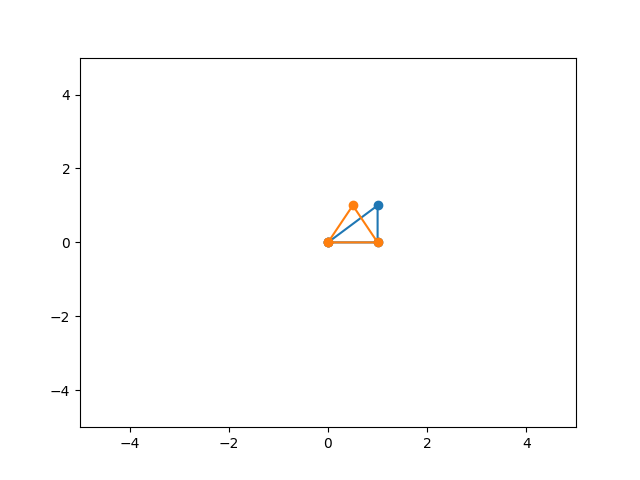

In [5]:
%matplotlib widget

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

fixed_vertices = np.array([[0, 0], [1, 0]])
initial_movable_vertex = np.array([1, 1])
offset_vector = isosceles_triangle_agent_offset(
    initial_movable_vertex,
    fixed_vertices[0],
    fixed_vertices[1],
)

line_points_current = np.vstack([fixed_vertices, initial_movable_vertex, fixed_vertices[0]])
ax.plot(line_points_current[:, 0], line_points_current[:, 1], "o-")
line_points_offset = np.vstack([fixed_vertices, initial_movable_vertex + offset_vector, fixed_vertices[0]])
ax.plot(line_points_offset[:, 0], line_points_offset[:, 1], "o-")    

def on_click(event):
    if event.button == MouseButton.LEFT:
        x = event.xdata
        y = event.ydata
        line_points_current = np.vstack([fixed_vertices, [x, y], fixed_vertices[0]])
        ax.lines[0].set_xdata(line_points_current[:, 0])
        ax.lines[0].set_ydata(line_points_current[:, 1])
        
        offset_vector = isosceles_triangle_agent_offset(
            np.array([x, y]),
            fixed_vertices[0],
            fixed_vertices[1],
        )
        line_points_offset = np.vstack([fixed_vertices, [x, y] + offset_vector, fixed_vertices[0]])
        ax.lines[1].set_xdata(line_points_offset[:, 0])
        ax.lines[1].set_ydata(line_points_offset[:, 1])
        plt.draw()


fig.canvas.mpl_connect("button_press_event", on_click)

plt.show()


In [6]:
N_AGENTS = 10
RADIUS = 5
N_STEPS = 100
MOVEMENT_PER_STEP = 0.1

agents = arrange_in_circle(N_AGENTS, RADIUS)
partners = get_random_partners(N_AGENTS)

agents_over_time = [agents.copy()]

for _ in range(N_STEPS):
    moved_agents = agents.copy()
    for i, (partner_1, partner_2) in enumerate(partners):
        agent = agents[i]
        partner_1 = agents[partner_1]
        partner_2 = agents[partner_2]
        agent_offset = isosceles_triangle_agent_offset(agent, partner_1, partner_2)
        moved_agents[i] = agent + MOVEMENT_PER_STEP * agent_offset
    
    agents = moved_agents
    agents_over_time.append(agents.copy())


C:\Users\mohes\AppData\Local\Temp\ipykernel_13672\1363059655.py:9: RuntimeWarning: invalid value encountered in scalar divide
  proj = np.dot(a_r1, r1_r2) / np.dot(r1_r2, r1_r2) * r1_r2


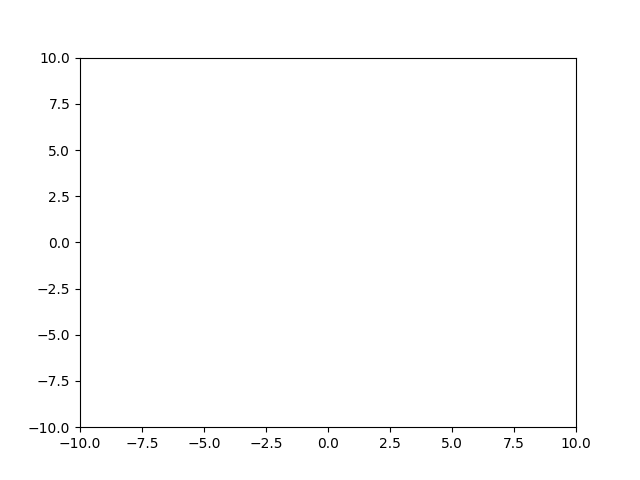

In [8]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Create a scatterplot of the agents
fig, ax = plt.subplots()
scatter = ax.scatter(agents[:, 0], agents[:, 1])

# Set the axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Function to update the scatterplot
def update_plot(step):
    scatter.set_offsets(agents_over_time[step])
    fig.canvas.draw()

# Create an interactive slider
slider = widgets.IntSlider(min=0, max=N_STEPS, step=1, value=0)

# Create a button to update the plot
button = widgets.Button(description="Next Step")

# Function to handle button click
def on_button_click(b):
    slider.value += 1

# Link the button click to the function
button.on_click(on_button_click)

# Create a VBox layout to display the slider and button
widgets.VBox([slider, button])

# Display the plot
plt.show()
